In [8]:
import re
import numpy as np
import json
import pandas as pd

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import PIL.Image
from IPython.display import display

#!pip install nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')
import gensim.models.word2vec as w2v


In [15]:
def pre_procesado(texto):
    
    texto = texto.lower() # minúsculas
    texto = re.sub(r"[\W\d_]+", " ",texto) # remove caract, números
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_en] # stopwords
    texto = " ".join(texto)
    return texto

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving RickAndMortyScripts.csv to RickAndMortyScripts.csv
User uploaded file "RickAndMortyScripts.csv" with length 210094 bytes


In [13]:
path = 'RickAndMortyScripts.csv'
data = pd.read_csv(path)
data.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


In [16]:
data['preprocesado'] = data['line'].apply(lambda text: pre_procesado(text))
data.head()

,index,season no.,episode no.,episode name,name,line,preprocesado
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...,morty gotta come jus gotta come
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?",rick going
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty.",got surprise morty
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...,middle night talking
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h...",come got surprise come hurry


In [34]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


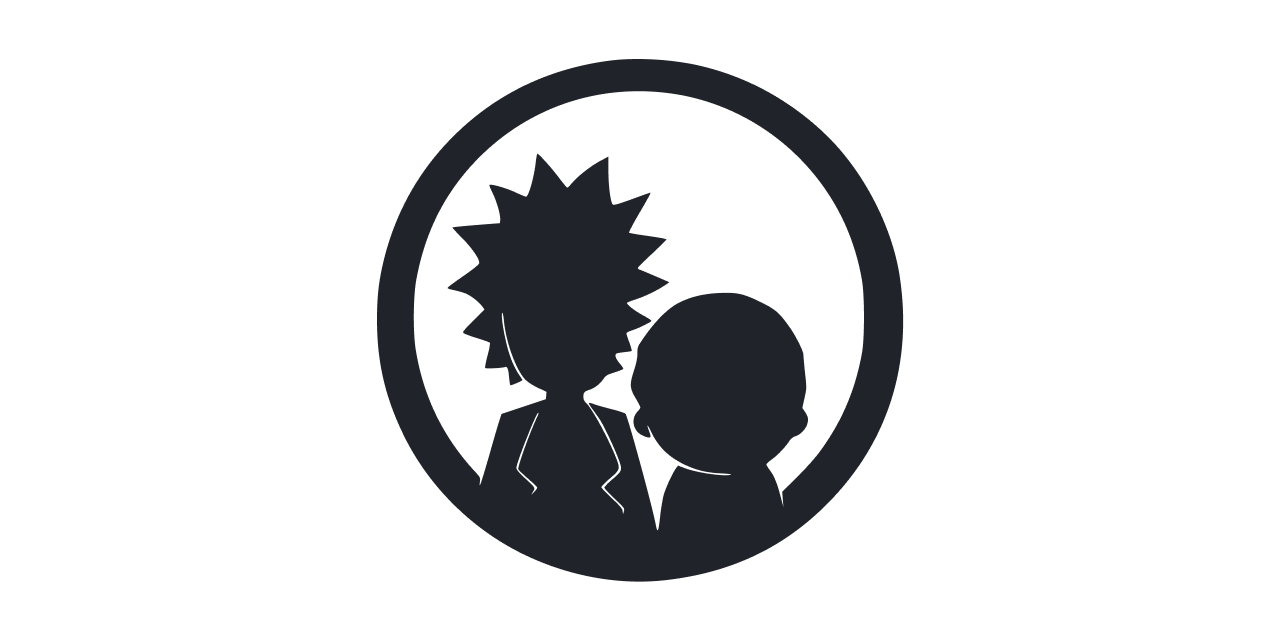

In [35]:
RyM = PIL.Image.open("RyM.jpg")
display(RyM)

In [36]:
mask = np.array(RyM)
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

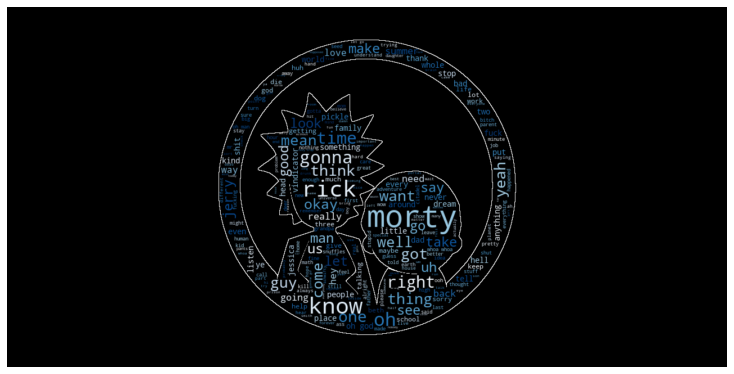

In [38]:
palabras = data.preprocesado.str.cat(sep=" ")
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='black', colormap='Blues',
                      stopwords=None,
                      mask=mask, contour_width=0.5, contour_color='white').generate(palabras)
 
wordcloud.to_file("RyM_wordcloud.png")
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()